# **CONTEXT**
The objective of this project is to apply exploratory analysis and regression techniques to identify which features affect home prices the most in the Melbourne Housing Market.

# **DATA PRE-PREPROCESSING**
The first step is to load the data and gain a better understanding of the information each column contains.  

In [882]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

In [883]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [884]:
# Read data
dataset = pd.read_csv('/content/drive/My Drive/Melbourne_housing_extra_data-18-08-2017.csv')

In [885]:
!ls

drive  sample_data


In [886]:
# Number of rows and columns
print(dataset.shape)

# View first few records
dataset.head()

(19741, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [887]:
# View data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19741 entries, 0 to 19740
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         19741 non-null  object 
 1   Address        19741 non-null  object 
 2   Rooms          19741 non-null  int64  
 3   Type           19741 non-null  object 
 4   Price          15397 non-null  float64
 5   Method         19741 non-null  object 
 6   SellerG        19741 non-null  object 
 7   Date           19741 non-null  object 
 8   Distance       19740 non-null  float64
 9   Postcode       19740 non-null  float64
 10  Bedroom2       15686 non-null  float64
 11  Bathroom       15686 non-null  float64
 12  Car            15686 non-null  float64
 13  Landsize       15659 non-null  float64
 14  BuildingArea   8382 non-null   float64
 15  YearBuilt      9649 non-null   float64
 16  CouncilArea    15656 non-null  object 
 17  Lattitude      15804 non-null  float64
 18  Longti

In [888]:
# Identify object columns
print(dataset.select_dtypes(['object']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [889]:
# Convert objects to categorical variables
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']

for colname in obj_cats:
    dataset[colname] = dataset[colname].astype('category')  

In [890]:
# Convert to date object
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [891]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,19741.0,2.947115e+00,0.981046,1.00000,2.000000,3.0000,4.000000e+00,1.200000e+01
Price,15397.0,1.054929e+06,645244.681529,85000.00000,630000.000000,880000.0000,1.301000e+06,9.000000e+06
Distance,19740.0,9.862660e+00,5.553402,0.00000,6.100000,9.2000,1.260000e+01,4.740000e+01
Postcode,19740.0,3.106525e+03,88.413069,3000.00000,3046.000000,3101.0000,3.147000e+03,3.978000e+03
Bedroom2,15686.0,2.908262e+00,1.006038,0.00000,2.000000,3.0000,3.000000e+00,3.000000e+01
Bathroom,15686.0,1.551320e+00,0.713287,0.00000,1.000000,1.0000,2.000000e+00,1.200000e+01
Car,15686.0,1.583641e+00,0.972224,0.00000,1.000000,2.0000,2.000000e+00,2.600000e+01
Landsize,15659.0,5.381542e+02,3709.919527,0.00000,165.000000,410.0000,6.500000e+02,4.330140e+05
BuildingArea,8382.0,1.488852e+02,139.087299,0.00000,93.000000,127.0000,1.780000e+02,6.791000e+03
YearBuilt,9649.0,1.963394e+03,38.021476,1196.00000,1940.000000,1970.0000,1.999000e+03,2.106000e+03


In [892]:
# Convert numeric variables to categorical
num_cats = ['Postcode']  

for colname in num_cats:
    dataset[colname] = dataset[colname].astype('category')   

# Confirm changes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19741 entries, 0 to 19740
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         19741 non-null  category      
 1   Address        19741 non-null  category      
 2   Rooms          19741 non-null  int64         
 3   Type           19741 non-null  category      
 4   Price          15397 non-null  float64       
 5   Method         19741 non-null  category      
 6   SellerG        19741 non-null  category      
 7   Date           19741 non-null  datetime64[ns]
 8   Distance       19740 non-null  float64       
 9   Postcode       19740 non-null  category      
 10  Bedroom2       15686 non-null  float64       
 11  Bathroom       15686 non-null  float64       
 12  Car            15686 non-null  float64       
 13  Landsize       15659 non-null  float64       
 14  BuildingArea   8382 non-null   float64       
 15  YearBuilt      9649

In [893]:
# Examine Rooms v Bedroom2
dataset['Rooms v Bedroom2'] = dataset['Rooms'] - dataset['Bedroom2']
dataset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Rooms v Bedroom2
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra,-37.80140,144.99580,Northern Metropolitan,4019.0,0.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,0.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,0.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra,-37.81140,145.01160,Northern Metropolitan,4019.0,0.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19736,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,2017-07-29,4.6,3181.0,2.0,1.0,1.0,0.0,61.6,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0,0.0
19737,Wollert,60 Saltlake Bvd,3,h,525300.0,S,Stockdale,2017-07-29,25.5,3750.0,3.0,2.0,2.0,400.0,NaN,NaN,Whittlesea,-37.61387,145.03850,Northern Metropolitan,2940.0,0.0
19738,Yarraville,2 Adeney St,2,h,750000.0,SP,hockingstuart,2017-07-29,6.3,3013.0,2.0,1.0,2.0,269.0,NaN,NaN,Maribyrnong,-37.81649,144.86731,Western Metropolitan,6543.0,0.0
19739,Yarraville,54 Pentland Pde,6,h,2450000.0,VB,Village,2017-07-29,6.3,3013.0,6.0,3.0,2.0,1087.0,388.5,1920.0,Maribyrnong,-37.81038,144.89389,Western Metropolitan,6543.0,0.0


The differences between these variables are minimal so keeping both would only be duplicating information.  Thus, the Bedroom2 feature will be removed from the data set altogether to allow for better analysis downstream.  

In [894]:
# Drop columns
dataset = dataset.drop(['Bedroom2','Rooms v Bedroom2'],1)

In [895]:
# Add age variable
dataset['Age'] = 2017 - dataset['YearBuilt']

# Identify historic homes
dataset['Historic'] = np.where(dataset['Age']>=50,'Historic','Contemporary')

# Convert to Category
dataset['Historic'] = dataset['Historic'].astype('category')

In [896]:
# Number of entries
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19741 entries, 0 to 19740
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         19741 non-null  category      
 1   Address        19741 non-null  category      
 2   Rooms          19741 non-null  int64         
 3   Type           19741 non-null  category      
 4   Price          15397 non-null  float64       
 5   Method         19741 non-null  category      
 6   SellerG        19741 non-null  category      
 7   Date           19741 non-null  datetime64[ns]
 8   Distance       19740 non-null  float64       
 9   Postcode       19740 non-null  category      
 10  Bathroom       15686 non-null  float64       
 11  Car            15686 non-null  float64       
 12  Landsize       15659 non-null  float64       
 13  BuildingArea   8382 non-null   float64       
 14  YearBuilt      9649 non-null   float64       
 15  CouncilArea    1565

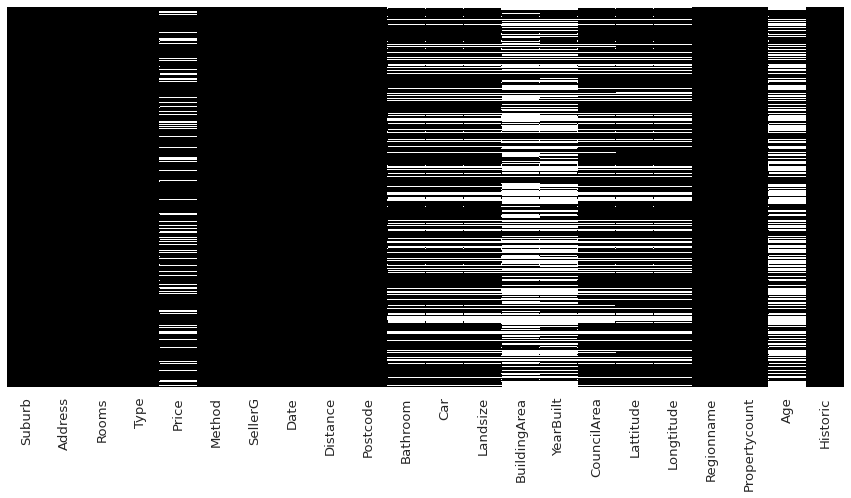

In [897]:
# Visualize missing values
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.2)
sns.heatmap(dataset.isnull(),yticklabels = False, cbar = False, cmap = 'Greys_r')
plt.show()

In [898]:
# Count of missing values
dataset.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             4344
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          4055
Car               4055
Landsize          4082
BuildingArea     11359
YearBuilt        10092
CouncilArea       4085
Lattitude         3937
Longtitude        3937
Regionname           1
Propertycount        1
Age              10092
Historic             0
dtype: int64

In [899]:
# Percentage of missing values
dataset.isnull().sum()/len(dataset)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            22.004964
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.005066
Postcode          0.005066
Bathroom         20.541006
Car              20.541006
Landsize         20.677777
BuildingArea     57.540145
YearBuilt        51.122030
CouncilArea      20.692974
Lattitude        19.943265
Longtitude       19.943265
Regionname        0.005066
Propertycount     0.005066
Age              51.122030
Historic          0.000000
dtype: float64

There are a significant amount of missing values in Price, Bathroom, Car, Landsize, Building Area, YearBuilt, Council Area, Lattitude, and Longitude. To allow for a more complete analysis, observations missing any data will be removed from the dataset.  

In [900]:
# View missing data
#dataset[dataset['Bedroom2'].isnull()]
#To remove rows missing data in a specific column 
# dataset =dataset[pd.notnull(dataset['Price'])]

# To remove an entire column
#dataset = dataset.drop('Bedroom2',axis = 1)

# Remove rows missing data
dataset = dataset.dropna()

# Confirm that observations missing data were removed  
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 2 to 19739
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         6196 non-null   category      
 1   Address        6196 non-null   category      
 2   Rooms          6196 non-null   int64         
 3   Type           6196 non-null   category      
 4   Price          6196 non-null   float64       
 5   Method         6196 non-null   category      
 6   SellerG        6196 non-null   category      
 7   Date           6196 non-null   datetime64[ns]
 8   Distance       6196 non-null   float64       
 9   Postcode       6196 non-null   category      
 10  Bathroom       6196 non-null   float64       
 11  Car            6196 non-null   float64       
 12  Landsize       6196 non-null   float64       
 13  BuildingArea   6196 non-null   float64       
 14  YearBuilt      6196 non-null   float64       
 15  CouncilArea    6196 

In [901]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,6196.0,2.931407e+00,0.971079,1.00000,2.000000,3.00000,4.000000e+00,8.000000e+00
Price,6196.0,1.068828e+06,675156.427502,131000.00000,620000.000000,880000.00000,1.325000e+06,9.000000e+06
Distance,6196.0,9.751097e+00,5.612065,0.00000,5.900000,9.00000,1.240000e+01,4.740000e+01
Bathroom,6196.0,1.576340e+00,0.711362,1.00000,1.000000,1.00000,2.000000e+00,8.000000e+00
Car,6196.0,1.573596e+00,0.929947,0.00000,1.000000,1.00000,2.000000e+00,1.000000e+01
Landsize,6196.0,4.710069e+02,897.449881,0.00000,152.000000,373.00000,6.280000e+02,3.700000e+04
BuildingArea,6196.0,1.415686e+02,90.834824,0.00000,91.000000,124.00000,1.700000e+02,3.112000e+03
YearBuilt,6196.0,1.964082e+03,38.105673,1196.00000,1940.000000,1970.00000,2.000000e+03,2.018000e+03
Lattitude,6196.0,-3.780790e+01,0.075850,-38.16492,-37.855438,-37.80225,-3.775820e+01,-3.745709e+01
Longtitude,6196.0,1.449902e+02,0.099165,144.54237,144.926198,144.99580,1.450527e+02,1.455264e+02


In [902]:
dataset[dataset['Age']>800]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
16424,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,2017-06-24,14.2,3149.0,1.0,4.0,807.0,117.0,1196.0,Monash,-37.86788,145.12121,Eastern Metropolitan,13366.0,821.0,Historic


In [903]:
dataset[dataset['BuildingArea']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
7211,North Melbourne,19 Shands La,2,t,841000.0,S,Jellis,2017-04-03,2.3,3051.0,1.0,1.0,215.0,0.0,2000.0,Melbourne,-37.7953,144.9437,Northern Metropolitan,6821.0,17.0,Contemporary


In [904]:
dataset[dataset['Landsize']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
25,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,2016-12-11,2.5,3067.0,2.0,1.0,0.0,94.00,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4019.0,8.0,Contemporary
42,Abbotsford,6/219 Nicholson St,2,u,500000.0,S,Collins,2016-06-18,2.5,3067.0,1.0,1.0,0.0,60.00,1970.0,Yarra,-37.80150,144.99720,Northern Metropolitan,4019.0,47.0,Contemporary
57,Abbotsford,11/205 Gipps St,1,u,470000.0,S,Nelson,2016-07-26,2.5,3067.0,1.0,1.0,0.0,50.00,2013.0,Yarra,-37.80550,144.99610,Northern Metropolitan,4019.0,4.0,Contemporary
67,Airport West,50 Bedford St,3,h,730000.0,VB,Nelson,2016-03-12,13.5,3042.0,2.0,1.0,0.0,145.00,1965.0,Moonee Valley,-37.72030,144.87550,Western Metropolitan,3464.0,52.0,Historic
68,Airport West,50 Bedford St,3,h,770000.0,SP,Nelson,2017-04-03,13.5,3042.0,2.0,1.0,0.0,145.00,1965.0,Moonee Valley,-37.72030,144.87550,Western Metropolitan,3464.0,52.0,Historic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19678,South Yarra,9/17 Howitt St,2,u,570000.0,VB,Ray,2017-07-29,2.7,3141.0,1.0,1.0,0.0,64.00,1965.0,Stonnington,-37.84679,145.00206,Southern Metropolitan,14887.0,52.0,Historic
19685,St Kilda,45/151 Fitzroy St,2,u,600000.0,VB,hockingstuart,2017-07-29,5.0,3182.0,1.0,1.0,0.0,82.00,1930.0,Port Phillip,-37.85911,144.97900,Southern Metropolitan,13240.0,87.0,Historic
19710,Tullamarine,9/200 Melrose Dr,2,u,300000.0,SP,Jason,2017-07-29,12.9,3043.0,1.0,1.0,0.0,66.32,1980.0,Hume,-37.69815,144.88019,Western Metropolitan,3296.0,37.0,Contemporary
19734,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,2017-07-29,6.8,3016.0,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0,50.0,Historic


In [905]:
# Remove outlier
dataset = dataset[dataset['BuildingArea']!=0]

# Confirm removal
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,6195.0,2.931558e+00,0.971085,1.00000,2.000000,3.0000,4.000000e+00,8.000000e+00
Price,6195.0,1.068865e+06,675204.719649,131000.00000,620000.000000,880000.0000,1.325000e+06,9.000000e+06
Distance,6195.0,9.752300e+00,5.611720,0.00000,5.900000,9.0000,1.240000e+01,4.740000e+01
Bathroom,6195.0,1.576433e+00,0.711382,1.00000,1.000000,1.0000,2.000000e+00,8.000000e+00
Car,6195.0,1.573688e+00,0.929993,0.00000,1.000000,1.0000,2.000000e+00,1.000000e+01
Landsize,6195.0,4.710483e+02,897.516427,0.00000,152.000000,373.0000,6.280000e+02,3.700000e+04
BuildingArea,6195.0,1.415915e+02,90.824342,1.00000,91.000000,124.0000,1.700000e+02,3.112000e+03
YearBuilt,6195.0,1.964076e+03,38.106016,1196.00000,1940.000000,1970.0000,2.000000e+03,2.018000e+03
Lattitude,6195.0,-3.780791e+01,0.075856,-38.16492,-37.855455,-37.8023,-3.775820e+01,-3.745709e+01
Longtitude,6195.0,1.449902e+02,0.099171,144.54237,144.926195,144.9958,1.450527e+02,1.455264e+02


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


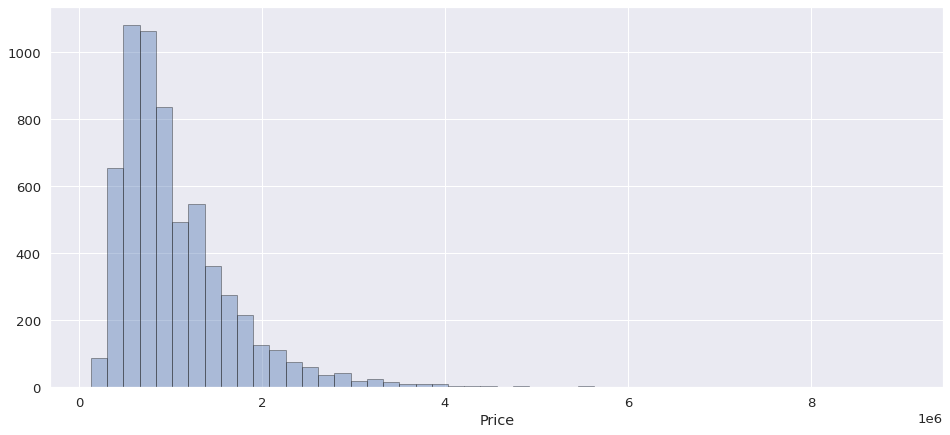

In [906]:
plt.figure(figsize=(16,7))
sns.distplot(dataset['Price'], kde = False,hist_kws=dict(edgecolor="k"))

In [907]:
# Identify categorical features
dataset.select_dtypes(['category']).columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Postcode',
       'CouncilArea', 'Regionname', 'Historic'],
      dtype='object')

In [908]:
# Abbreviate Regionname categories
dataset['Regionname'] = dataset['Regionname'].map({'Northern Metropolitan':'N Metro',
                                            'Western Metropolitan':'W Metro', 
                                            'Southern Metropolitan':'S Metro', 
                                            'Eastern Metropolitan':'E Metro', 
                                            'South-Eastern Metropolitan':'SE Metro', 
                                            'Northern Victoria':'N Vic',
                                            'Eastern Victoria':'E Vic',
                                            'Western Victoria':'W Vic'})

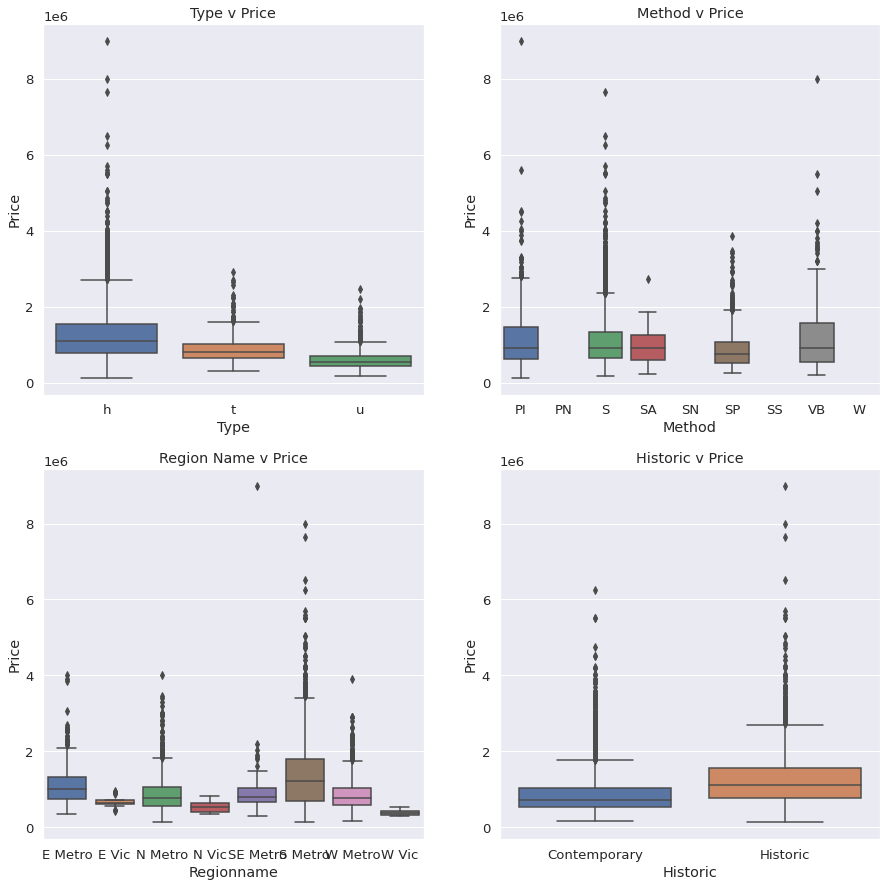

In [909]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = dataset, x = 'Type', y = 'Price', ax = axes[0,0])
axes[0,0].set_xlabel('Type')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Type v Price')

# Plot [0,1]
sns.boxplot(x = 'Method', y = 'Price', data = dataset, ax = axes[0,1])
axes[0,1].set_xlabel('Method')
#axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Method v Price')

# Plot [1,0]
sns.boxplot(x = 'Regionname', y = 'Price', data = dataset, ax = axes[1,0])
axes[1,0].set_xlabel('Regionname')
#axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Region Name v Price')

# Plot [1,1]
sns.boxplot(x = 'Historic', y = 'Price', data = dataset, ax = axes[1,1])
axes[1,1].set_xlabel('Historic')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Historic v Price')

plt.show()

### **Numeric Features**
Next, I visualize the relationships between numeric features in the dataset and price.  

In [910]:
# Identify numeric features
dataset.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

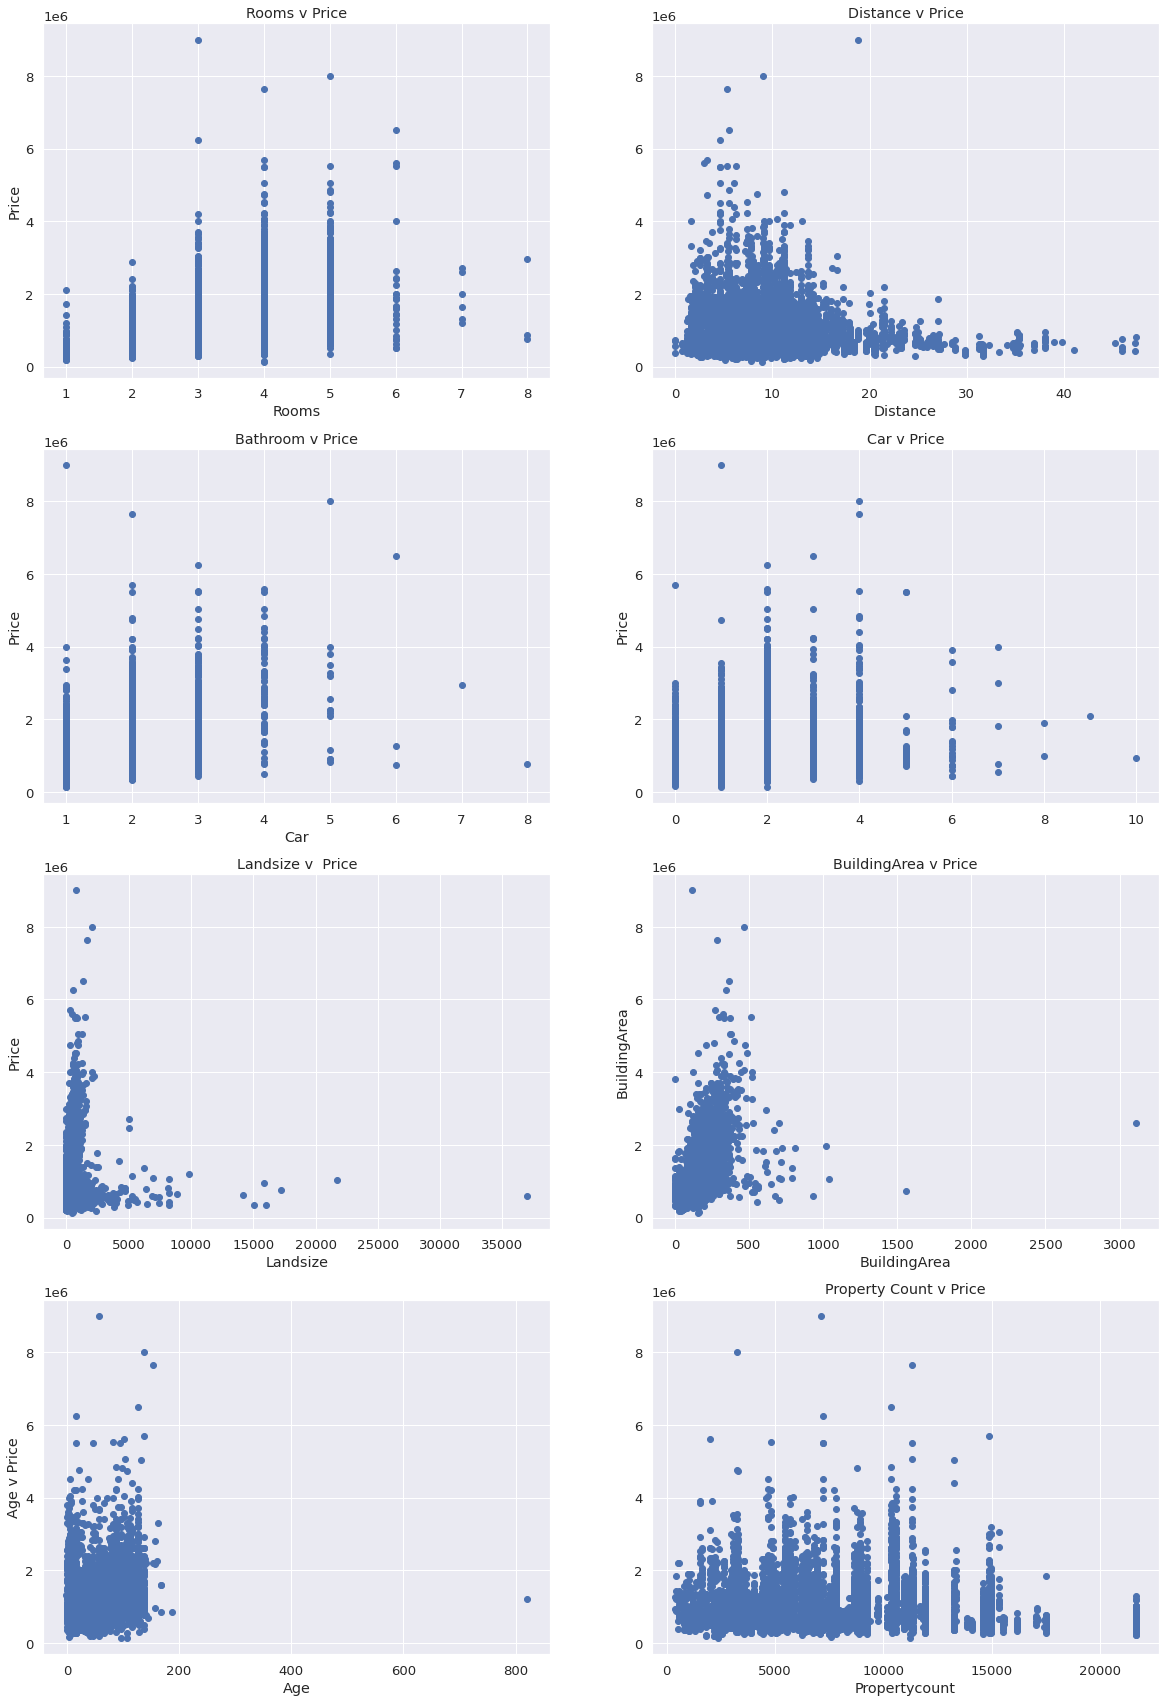

In [911]:
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = dataset, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = dataset, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = dataset, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = dataset, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = dataset, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = dataset, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')

# Plot [3,0]
axes[3,0].scatter(x = 'Age', y = 'Price', data = dataset, edgecolor = 'b')
axes[3,0].set_xlabel('Age')
axes[3,0].set_ylabel('Price')
axes[3,0].set_ylabel('Age v Price')

# Plot [3,1]
axes[3,1].scatter(x = 'Propertycount', y = 'Price', data = dataset, edgecolor = 'b')
axes[3,1].set_xlabel('Propertycount')
#axes[3,1].set_ylabel('Price')
axes[3,1].set_title('Property Count v Price')

plt.show()

In [912]:
# Pairplot
#sns.pairplot(dataset,vars= ['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize','BuildingArea',  'Propertycount','Age'], palette = 'viridis')

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

Text(0.5, 1.0, 'Variable Correlation')

**Weak Positive Correlation  **  
Age and Price  

**Moderate Positive Correlation**   
Rooms and Price    
Bathrooms and Price    
Building Area and Price    

The Rooms, Bathroom, and BuildingArea features are also moderately correlated with one another as they are all measures of home size. 

# Model 1: Linear Regression Model

In [ ]:
X = dataset.drop(["Address","Price","Date", "SellerG","Suburb","Type","Method","CouncilArea","Regionname","Historic"],axis=1)
y = dataset['Price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


linear_model = LinearRegression()

In [ ]:
linear_model.fit(X_train,y_train)

In [ ]:
print(linear_model.intercept_)

In [ ]:
X.columns

In [ ]:
coeff_df = pd.DataFrame(linear_model.coef_,X.columns,columns=['Coefficient'])
ranked_suburbs = coeff_df.sort_values("Coefficient", ascending = False)
ranked_suburbs

In [ ]:
predictions = linear_model.predict(X_test)

### Analyze the Residuals

In [ ]:
plt.scatter(y_test, predictions)

In [ ]:
# plt.scatter(y_test, predictions)
# plt.ylim([200000,1000000])
# plt.xlim([200000,1000000])

In [ ]:
sns.distplot((y_test-predictions),bins=50)

### Evaluation

In [ ]:
  plt.figure(figsize=(10,5))
  sns.distplot(y_test, hist=True, kde=False)
  sns.distplot(predictions, hist=True, kde=False)
  plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
  plt.xlim(0,)

Regression Evaluation Metrics
Three common evaluation metrics for regresson problems:

Mean Absolute Error (MAE)
Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
All basic variations on the difference between what you predicted and the true values.
Comparing these metrics:

* MAE is the easiest to understand, because it's the average error.
* MSE more popular than MAE, because MSE "punishes" larger errors, tends to be useful in the real world.
* RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units (target units) .

All of these are loss functions, because we want to minimize them.

In [ ]:
from sklearn import metrics

In [ ]:
linear_regression_score = linear_model.score(X_test,y_test)
linear_regression_MAE = metrics.mean_absolute_error(y_test, predictions)
linear_regression_MSE = metrics.mean_squared_error(y_test, predictions)
linear_regression_RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))

print("Score:", linear_regression_score)
print("MAE:", linear_regression_MAE )
print('MSE:', linear_regression_MSE )
print('RMSE:', linear_regression_RMSE )



In [ ]:
import pickle
file = open('/content/drive/My Drive/linear_model.pkl', 'wb')
pickle.dump(linear_model, file)

import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("/content/drive/My Drive/linear_columns.json","w") as f:
    f.write(json.dumps(columns))

# Method 2: Random Forest

In [ ]:
# Fit and run a random forest model.
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(FSGD_X_train_final, FSGD_y_train_final)
rf_pred = rf.predict(FSGD_X_test_final)




In [ ]:
plt.scatter(FSGD_y_test_final, rf_pred)

In [ ]:
sns.distplot((FSGD_y_test_final-rf_pred),bins=50)

### Evaluation

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(FSGD_y_test_final, hist=True, kde=False)
sns.distplot(rf_pred, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,)

In [ ]:
# Print score and errors.

rf_score =  rf.score(FSGD_X_test_final, FSGD_y_test_final)
rf_MAE =  metrics.mean_absolute_error(FSGD_y_test_final, rf_pred)
rf_MSE = metrics.mean_squared_error(FSGD_y_test_final, rf_pred)
rf_RMSE =  np.sqrt(metrics.mean_squared_error(FSGD_y_test_final, rf_pred))

print('Score: ',rf_score)
print('MAE: ',rf_MAE)
print('MSE: ',rf_MSE  )
print('RMSE: ',rf_RMSE)


In [ ]:
import pickle
file = open('/content/drive/My Drive/random_forest_model.pkl', 'wb')
pickle.dump(rf, file)

import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("/content/drive/My Drive/random_forest_columns.json","w") as f:
    f.write(json.dumps(columns))

# Method 3: Gradient Boosting

In [ ]:
# Split the dataframe into a train and test set.

FSGD_X = dataset.drop(["Address","Price","Date", "SellerG","Suburb","Type","Method","CouncilArea","Regionname","Historic"],axis=1)
FSGD_Y = dataset['Price']

FSGD_X_train_final, FSGD_X_test_final, FSGD_y_train_final, FSGD_y_test_final = train_test_split(FSGD_X, FSGD_Y, test_size=0.3, random_state=123)

In [ ]:
# Fit and run a gradient boost model.
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=0.1, loss='huber')
clf.fit(FSGD_X_train_final, FSGD_y_train_final)
clf_pred = clf.predict(FSGD_X_test_final)


In [ ]:
plt.scatter(FSGD_y_test_final, clf_pred)

In [ ]:
sns.distplot((FSGD_y_test_final-clf_pred),bins=50)

### Evaluation 

In [ ]:
  plt.figure(figsize=(10,5))
  sns.distplot(FSGD_y_test_final, hist=True, kde=False)
  sns.distplot(clf_pred, hist=True, kde=False)
  plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
  plt.xlim(0,)

In [ ]:
# Print score and errors.

gradient_boost_score = clf.score(FSGD_X_test_final, FSGD_y_test_final)
gradient_boost_MAE = metrics.mean_absolute_error(FSGD_y_test_final, clf_pred)
gradient_boost_MSE = metrics.mean_squared_error(FSGD_y_test_final, clf_pred)
gradient_boost_RMSE = np.sqrt(metrics.mean_squared_error(FSGD_y_test_final, clf_pred))

print('Score: ',gradient_boost_score )
print('MAE: ', gradient_boost_MAE )
print('MSE: ',gradient_boost_MSE)
print('RMSE: ',gradient_boost_RMSE )

In [ ]:
import pickle
file = open('/content/drive/My Drive/gradient_boost_model.pkl', 'wb')
pickle.dump(clf, file)

import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("/content/drive/My Drive/gradient_boost_columns.json","w") as f:
    f.write(json.dumps(columns))

# **Conclusion**

In [ ]:
print("Method", "\t", "Linear Regression", "\t", "Random Forest   " ,"\t", "Gradient Boost")
print("Score", "\t", linear_regression_score, "\t",  rf_score ,"\t",gradient_boost_score)
print("MAE", "\t", linear_regression_MAE, "\t",rf_MAE ,"\t",  gradient_boost_MAE)
print("MSE", "\t", linear_regression_MSE, "\t", rf_MSE ,"\t", gradient_boost_MSE)
print("RMSE", "\t", linear_regression_RMSE, "\t", rf_RMSE,"\t",gradient_boost_RMSE  )

In [ ]:
print("Method             ", "\t", "Score          ", "\t","MAE            " ,"\t", "MSE              ", "\t", "RMSE")

print("Linear Regression", "\t", linear_regression_score, "\t", linear_regression_MAE ,"\t", linear_regression_MSE, "\t", linear_regression_RMSE)
print("Random Forest    ", "\t", rf_score, "\t", rf_MAE ,"\t", rf_MSE, "\t", rf_RMSE)
print("Gradient Boost     ", "\t", gradient_boost_score, "\t", gradient_boost_MAE ,"\t", gradient_boost_MSE, "\t", gradient_boost_RMSE)



=> Choose Gradient Boosting because of approximately 83% Score